In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix   #for confusion matrix
import seaborn as sns
from sklearn import metrics
import sys

In [3]:
weather_df=pd.read_csv('/content/drive/MyDrive/woc/weather.csv')
weather_df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In our dataset we have...<br>
***Features (X)***:  precipitation,temp_max,temp_min,wind <br>
***Target variable (Y):*** weather <br>

In [4]:
np.unique(weather_df['weather'])

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

In [5]:
weather_df.shape

(1461, 5)

In [6]:
weather_df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

As we can see, our dataframe doesn't contain any null values..

In [7]:
weather_df.dropna() # Drop the rows which contains null values
weather_df.shape

(1461, 5)

Data types of each column:

In [8]:
weather_df.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(weather_df['weather'])
 

# removing the column 'weather' from df
# as it is of no use now.
weather_df.drop("weather", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
weather_df["weather"] = label
 
# printing Dataframe
weather_df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [14]:

features = weather_df.iloc[:, :-1] # all col except last are features
target = weather_df.iloc[:, -1].values.reshape((features.shape[0], 1)) # last col

#replace col state with categorical cols


In [15]:
features.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [16]:
target

array([[0],
       [2],
       [2],
       ...,
       [1],
       [4],
       [4]])

There are five classes for our target variable "weather".So we are going to use OVR method to apply logistic regression. As logistic regression can only be used when we have binary classification problem<br>

**One-vs-Rest (OVR) Method:**<br>

Many popular classification algorithms were designed natively for binary classification problems. These algorithms include :

* Logistic Regression
* Support Vector Machines (SVM)
* Perceptron Models


Since there are five classes in the classification problem, the One-vs-Rest method will break down this problem into five binary classification problems:

* Problem 1 : drizzle vs ['fog', 'rain', 'snow', 'sun']
* Problem 2 : fog vs ['drizzle', 'rain', 'snow', 'sun']
* Problem 3 : rain vs ['fog', 'drizzle', 'snow', 'sun']
* Problem 4 : snow vs ['fog', 'rain', 'drizzle', 'sun']
* Problem 5 : sun vs ['fog', 'rain', 'snow', 'drizzle']

So instead of solving it as drizzle vs fog vs rain vs snow vs sun, it is solved using five binary classification problems as shown above.

In [17]:
target[:8]

array([[0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features[['precipitation','temp_max'	,'temp_min',	'wind']],target,test_size=0.3)

In [52]:
# Normalizing the data

norm = MinMaxScaler().fit(X_train)

X_train_normalized = norm.transform(X_train)

X_test_normalized = norm.transform(X_test)

In [53]:
log_reg_obj = LogisticRegression(multi_class='ovr')
log_reg_obj.fit(X_train_normalized,y_train.ravel()) #ravel will convert that array shape to (n, ) (i.e. flatten it)

LogisticRegression(multi_class='ovr')

In [55]:
y_pred=log_reg_obj.predict(X_test_normalized)
y_pred

array([4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2,
       2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4,
       2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2,
       4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2,
       4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2,

In [56]:
print("Training set accuracy:",log_reg_obj.score(X_train_normalized,y_train)*100)
print("Testing set accuracy:",log_reg_obj.score(X_test_normalized,y_test)*100)

Training set accuracy: 72.70058708414872
Testing set accuracy: 74.4874715261959


In [57]:
cm=confusion_matrix(y_test, y_pred)


In [58]:
score = log_reg_obj.score(X_test_normalized, y_test)
#print(score)

Confusion matrix using seaborn

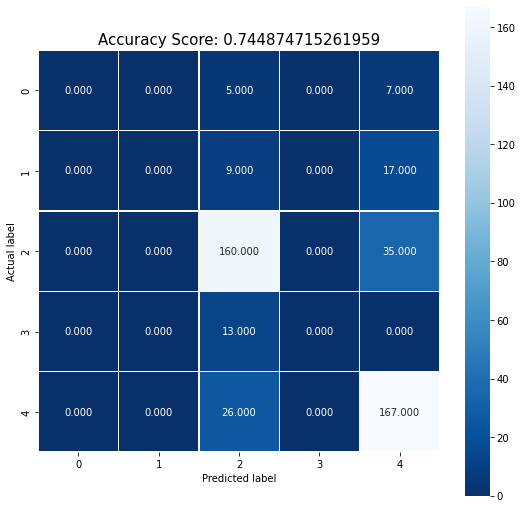

In [59]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);